<a href="https://colab.research.google.com/github/Zulfadly-MU/T3-Zulfadly-Syahpahlevi_230907502035-Data-Cleaning-Uji-coba/blob/main/T3_Zulfadly_Syahpahlevi_230907502035_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crawl Data Twitter 1000 Baris
Tugas Crawling data twitter matakuliah Social media analysis dari Zulfadly Syahpahlevi (230907502035)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Error: File 'Manchester_United.csv' tidak ditemukan. Pastikan file berada di direktori yang benar.

DataFrame columns after cleaning:
Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username', 'clean_text'],
      dtype='object')

Preview Data after cleaning:
   conversation_id_str                      created_at  favorite_count  \
0  1965003796813414877  Mon Sep 08 11:00:29 +0000 2025               0   
1  1965002267955986786  Mon Sep 08 10:40:23 +0000 2025               0   
2  1964999838942343439  Mon Sep 08 10:30:44 +0000 2025             708   
3  1964998713123971504  Mon Sep 08 10:26:15 +0000 2025               0   
4  1964998437721813039  Mon Sep 08 10:25:16 +0000 2025               0   

                                           full_text               id_str  \
0  @bbstvug Ye #AndreOan

<Figure size 800x500 with 0 Axes>

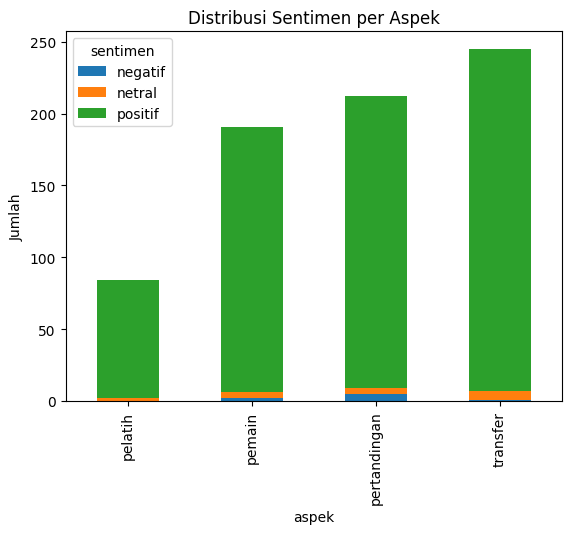

In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download stopwords & VADER if not yet
nltk.download('stopwords')
nltk.download('vader_lexicon')

# 1. Baca dataset
# Ganti 'Manchester_United.csv' dengan path file Anda jika perlu
try:
    df = pd.read_csv('/content/tweets-data/Manchester_United.csv')
    print("File CSV berhasil dimuat.")
except FileNotFoundError:
    print("Error: File 'Manchester_United.csv' tidak ditemukan. Pastikan file berada di direktori yang benar.")
    # exit() # Removed exit() to allow subsequent NameError if file not found

# Asumsi ada kolom bernama 'text' atau serupa, ubah sesuai nama kolom asli
# text_column = df.columns[0]  # ambil kolom pertama jika tidak tahu namanya
text_column = 'full_text' # Use the 'full_text' column for analysis

# 2. Preprocessing teks
stop_words = set(stopwords.words('indonesian'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)  # hapus URL
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # hapus tanda baca
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df[text_column].apply(clean_text)

# Add print statements to debug the clean_text column
print("\nDataFrame columns after cleaning:")
print(df.columns)
print("\nPreview Data after cleaning:")
print(df.head())

# Print some non-empty cleaned text entries for debugging
print("\nSome non-empty clean_text entries:")
non_empty_clean_text = df[df['clean_text'] != '']['clean_text'].head()
if not non_empty_clean_text.empty:
    for text in non_empty_clean_text:
        print(text)
else:
    print("No non-empty clean_text entries found.")


# 3. Definisi aspek (manual rule-based)
aspects = {
    "pemain": ["pemain", "rashford", "bruno", "garnacho", "maguirre", "ronaldo"],
    "pelatih": ["pelatih", "ten hag", "mourinho", "sir alex"],
    "pertandingan": ["pertandingan", "match", "laga", "menang", "kalah", "seri"],
    "transfer": ["transfer", "kontrak", "jual", "beli", "pinjam"]
}

# 4. Analisis Sentimen (VADER)
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "positif"
    elif score['compound'] <= -0.05:
        return "negatif"
    else:
        return "netral"

# 5. Deteksi aspek per kalimat + sentimen
results = []
for index, row in df.iterrows(): # Iterate through rows using iterrows()
    sentiment = get_sentiment(row['clean_text'])
    for aspect, keywords in aspects.items():
        if any(kw in row['clean_text'] for kw in keywords):
            results.append({"teks": row['clean_text'], "aspek": aspect, "sentimen": sentiment})

results_df = pd.DataFrame(results)
print("\nHasil Analisis Aspek:")
print(results_df.head())

# 6. Visualisasi distribusi
if not results_df.empty:
    plt.figure(figsize=(8,5))
    results_df.groupby(["aspek","sentimen"]).size().unstack().plot(kind="bar", stacked=True)
    plt.title("Distribusi Sentimen per Aspek")
    plt.ylabel("Jumlah")
    plt.show()
else:
    print("\nNo aspects found in the text to plot.")